# Customer Segmentation

### Implementing Algorithms
- KMeans Clustering
- Hierarchical Clustering
- DBSCAN

In [2]:
# importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn-libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.metrics import silhouette_score

# removing harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("RFM_cleaned_file.csv")

In [4]:
df.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary
0,0,12346,66,24,-204.41
1,1,12347,2,36,788.24
2,2,12348,73,5,48.76
3,3,12349,42,63,1786.46
4,4,12351,10,13,200.58


## Overview of the Dataset

In [5]:
# Removing the column

df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
print("Columns in the dataset : ")
for col in df.columns:
  print(col)

Columns in the dataset : 
CustomerID
Recency
Frequency
Monetary


In [7]:
print(f"The number of unique customers in the dataset is : {df['CustomerID'].nunique()}")

The number of unique customers in the dataset is : 4383


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4383 non-null   int64  
 1   Recency     4383 non-null   int64  
 2   Frequency   4383 non-null   int64  
 3   Monetary    4383 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 137.1 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4383.0,15350.611453,1700.737934,12346.00,13880.500,15354.0,16837.000,18287.00
Recency,4383.0,90.395848,98.177019,0.00,16.000,51.0,137.000,373.00
Frequency,4383.0,59.620123,123.781872,1.00,13.000,29.0,66.000,3522.00
Monetary,4383.0,1377.258848,6088.141512,-25111.09,204.155,474.1,1161.665,217118.75


## Preprocessing

In [10]:
# Scaling the data

scale=StandardScaler()
scaled_array=scale.fit_transform(df)
scaled_array

array([[-1.76685321, -0.24851672, -0.2877981 , -0.25982466],
       [-1.76626516, -0.90047482, -0.19084231, -0.09675959],
       [-1.76567711, -0.17720881, -0.44131143, -0.2182358 ],
       ...,
       [ 1.72555882,  2.08427083, -0.38475389, -0.15610138],
       [ 1.72614687,  0.20989131, -0.15852371, -0.10651244],
       [ 1.72673492, -0.74767214, -0.09388652, -0.00537152]])

## DBSCAN
- Density Based Spatial Clustering of Application with Noise

In [11]:
# Checking how the model performs

DBSCAN_model=DBSCAN(eps=0.5,min_samples=5)
df['DbSCAN_cluster']=DBSCAN_model.fit_predict(scaled_array)

In [12]:
# Clusters formed by the default vallue

df['DbSCAN_cluster'].value_counts()

,count
DbSCAN_cluster,
0,4265
-1,115
1,3


**Observation**
- We can see that there is 7 outliers present with the default parameter values.


**Silhouette Score**
- It is a metrics used to evaluate the quality of clustering, specifically by measuring how well each data points is clustered and how well it's separated from other cluster
- It provides a score that ranges from -1 to +1, with higher score indicating better cluster quality

In [13]:
# Radius Considered for Evaluation
radius=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.3,1.4,1.5,1.6]

# Looping through the radius
for eps in radius:
  model=DBSCAN(eps=eps,min_samples=5)
  df['DbSCAN_cluster']=model.fit_predict(scaled_array)
  print("Epsilon Considered : ",eps)
  print("Score : ",silhouette_score(scaled_array,df['DbSCAN_cluster']),'\n')

Epsilon Considered :  0.3
Score :  -0.2137430792980559 

Epsilon Considered :  0.4
Score :  0.24886182923405648 

Epsilon Considered :  0.5
Score :  -0.014458859139390132 

Epsilon Considered :  0.6
Score :  0.6959996360762787 

Epsilon Considered :  0.7
Score :  0.7123032308303615 

Epsilon Considered :  0.8
Score :  0.7336763370274495 

Epsilon Considered :  0.9
Score :  0.7548933860972652 

Epsilon Considered :  1
Score :  0.7821676098637927 

Epsilon Considered :  1.2
Score :  0.8006801638882124 

Epsilon Considered :  1.3
Score :  0.8134134687573129 

Epsilon Considered :  1.4
Score :  0.705334702212821 

Epsilon Considered :  1.5
Score :  0.7051441685026408 

Epsilon Considered :  1.6
Score :  0.7053822969159643 



**Observation**

- The optimum epsilon value can be choosen as **1.3**, as it gives the highest silhouette_score

In [14]:
sample=range(2,10)
for min_samp in sample:
  model=DBSCAN(eps=1.3,min_samples=min_samp)
  df['DbSCAN_cluster']=model.fit_predict(scaled_array)
  print("Min Samples Considered : ",min_samp)
  print("Clusters Formed",df['DbSCAN_cluster'].nunique())
  print("Score : ",silhouette_score(scaled_array,df['DbSCAN_cluster']),'\n')

Min Samples Considered :  2
Clusters Formed 4
Score :  0.6984736522337069 

Min Samples Considered :  3
Clusters Formed 3
Score :  0.704992418188001 

Min Samples Considered :  4
Clusters Formed 3
Score :  0.7140433835330162 

Min Samples Considered :  5
Clusters Formed 2
Score :  0.8134134687573129 

Min Samples Considered :  6
Clusters Formed 2
Score :  0.8084385374731022 

Min Samples Considered :  7
Clusters Formed 2
Score :  0.8061468145766439 

Min Samples Considered :  8
Clusters Formed 2
Score :  0.8061468145766439 

Min Samples Considered :  9
Clusters Formed 2
Score :  0.8034738628141022 



**Observation**

- If **5 min samples** can be considered as optimum value and has the highest average score

In [15]:
DBSCAN_model=DBSCAN(eps=1.3,min_samples=5)
df['DbSCAN_cluster']=DBSCAN_model.fit_predict(scaled_array)

In [16]:
# Clusters formed

df['DbSCAN_cluster'].value_counts()

,count
DbSCAN_cluster,
0,4344
-1,39


**Observation**
- Removing the -1 cluster as it is considered as Outliers and proceding with the KMeans and Hierarchical Clustering

In [17]:
# dropping the outliers identified by DBSCAN

df.drop(df[df['DbSCAN_cluster']==-1].index,inplace=True)

In [18]:
# scalling for the new dataframe
scaled_array=scale.fit_transform(df)


## KMeans Algorithm

In [19]:
# identifing the optimum number of clustering - elbow method

wcss=[]

for k in range(1,10):
  model=KMeans(n_clusters=k,random_state=42)
  model.fit(scaled_array)
  wcss.append(model.inertia_)

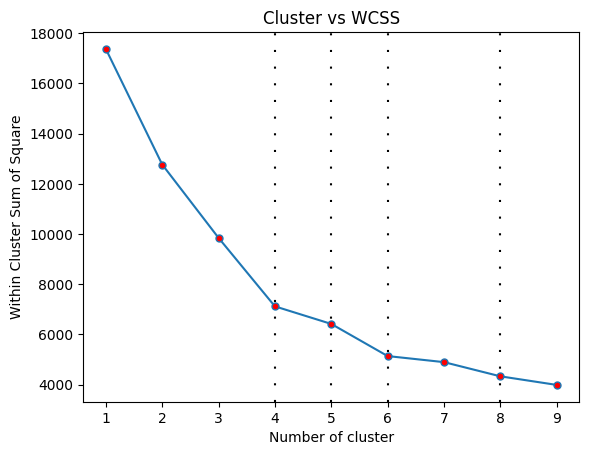

In [20]:
# elbow Graph - Visualization

plt.plot(range(1,10),wcss,marker="o",markerfacecolor='red',markersize=5)
plt.axvline(4,ls=":",dashes=(1,7),color='black')
plt.axvline(5,ls=":",dashes=(1,7),color='black')
plt.axvline(6,ls=":",dashes=(1,7),color='black')
plt.axvline(8,ls=":",dashes=(1,7),color='black')
plt.xlabel("Number of cluster")
plt.ylabel("Within Cluster Sum of Square")
plt.title("Cluster vs WCSS")
plt.show()

**Observation**

- Number of cluster can be considered is from 4 to 8 as optimal value for the given dataset
- For deeper understanding of the customer , considering 6 as the Number of clusters

In [21]:
# Building the model

Kmeans_model=KMeans(n_clusters=6,random_state=42)
df['KMeans-Cluster']=Kmeans_model.fit_predict(scaled_array)

In [22]:
df['KMeans-Cluster'].value_counts()

,count
KMeans-Cluster,
0,1425
3,1406
1,525
4,520
5,419
2,49


In [23]:
Kmeans_df=df.groupby('KMeans-Cluster')[['CustomerID','Recency','Frequency','Monetary']].agg({'CustomerID':'nunique',
                                                                                 'Recency':'sum',
                                                                                 'Frequency':'sum',
                                                                                 'Monetary':'sum'}).reset_index()

# Renaming the column name
Kmeans_df.rename(columns={'CustomerID':'Buyers_Count'},inplace=True)

In [24]:
# Each clusters Contribution for revenue

Kmeans_df['Revenue_percentage']=round(Kmeans_df['Monetary']/Kmeans_df['Monetary'].sum()*100,2)

# Buyers percentage in each cluster
Kmeans_df['Buyer_Percentage']=round(Kmeans_df['Buyers_Count']/Kmeans_df['Buyers_Count'].sum()*100,2)

In [25]:
Kmeans_df

,KMeans-Cluster,Buyers_Count,Recency,Frequency,Monetary,Revenue_percentage,Buyer_Percentage
0,0,1425,68015,55463,1107812.42,24.77,32.80
1,1,525,129838,8863,107122.75,2.40,12.09
2,2,49,934,12283,687489.80,15.37,1.13
3,3,1406,59935,59762,1005526.18,22.49,32.37
4,4,520,126874,8837,150082.23,3.36,11.97
5,5,419,9492,83031,1413633.08,31.61,9.65


**Observation**

- **Cluster 0** and **Customer 3** is the important/VIP customer who contributes 32% of the total revenue
- Special offers can be given to **Cluster 3** and **Cluster 0** to increase their visit and also result in the increase in the revenue of company.

**Recommendation**
- Clusters 0 & 3 (Loyal Customers): Maintain engagement through loyalty programs and personalized offers to sustain their purchasing behavior.

- Cluster 5: Offer exclusive deals or early access to products to reinforce their value and encourage continued high spending.

- Clusters 1 & 4 (Dormant Customers): Implement re-engagement campaigns, such as special discounts or personalized communications, to rekindle their interest.

- Cluster 2 (High-Spending, Low-Frequency): Investigate their purchasing patterns to identify opportunities for increased engagement, possibly through targeted promotions or product recommendations.


## Hierarchical Clustering

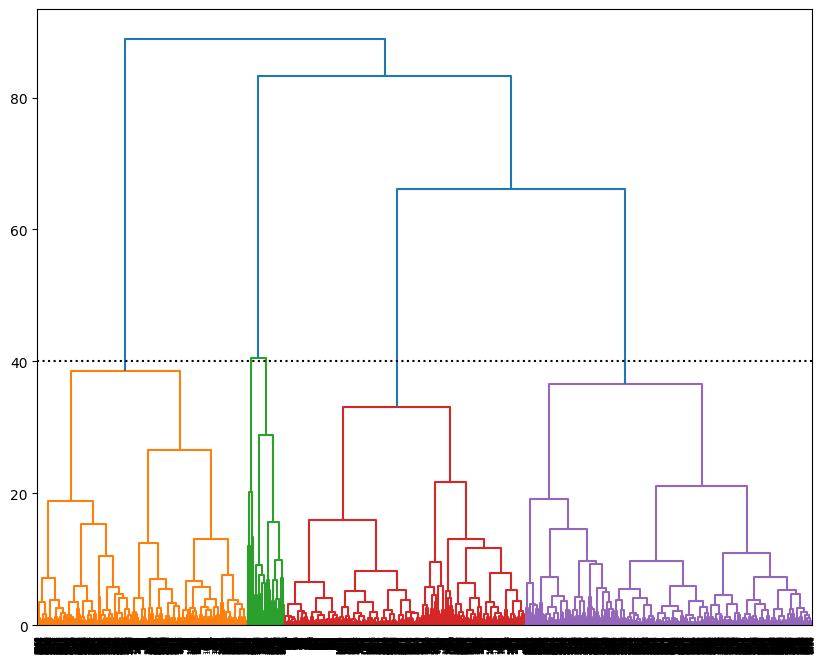

In [26]:
# Visualizing the hierarchical Clustering of the dataset

linked=linkage(scaled_array,method='ward')
plt.figure(figsize=(10,8))
dendrogram(linked)
plt.axhline(40,color='black',ls=":")
plt.show()

**Observation**
- Considering 7 as the optimal Cluster for the customer segmenation

In [27]:
# Creating the hierarchical Model

df['Hierarchy_Cluster']=fcluster(linked,5,criterion='maxclust')

In [28]:
df['Hierarchy_Cluster'].value_counts()

,count
Hierarchy_Cluster,
5,1607
4,1352
1,1178
3,171
2,36


In [29]:
Hierarchy_df=df.groupby('Hierarchy_Cluster')[['CustomerID','Recency','Frequency','Monetary']].agg({'CustomerID':'nunique',
                                                                                 'Recency':'sum',
                                                                                 'Frequency':'sum',
                                                                                 'Monetary':'sum'}).reset_index()

# Renaming the column name
Hierarchy_df.rename(columns={'CustomerID':'Buyers_Count'},inplace=True)

In [30]:
Hierarchy_df

,Hierarchy_Cluster,Buyers_Count,Recency,Frequency,Monetary
0,1,1178,271647,21291,293557.49
1,2,36,745,10388,547609.22
2,3,171,4487,39099,916630.77
3,4,1352,50866,69937,1412324.22
4,5,1607,67343,87524,1301544.76


In [31]:
# Each clusters Contribution for revenue

Hierarchy_df['Revenue_percentage']=round(Hierarchy_df['Monetary']/Hierarchy_df['Monetary'].sum()*100,2)

# Buyers percentage in each cluster
Hierarchy_df['Buyer_Percentage']=round(Hierarchy_df['Buyers_Count']/Hierarchy_df['Buyers_Count'].sum()*100,2)

In [32]:
Hierarchy_df

,Hierarchy_Cluster,Buyers_Count,Recency,Frequency,Monetary,Revenue_percentage,Buyer_Percentage
0,1,1178,271647,21291,293557.49,6.56,27.12
1,2,36,745,10388,547609.22,12.25,0.83
2,3,171,4487,39099,916630.77,20.50,3.94
3,4,1352,50866,69937,1412324.22,31.58,31.12
4,5,1607,67343,87524,1301544.76,29.11,36.99


**Observation**
- **Cluster 3** These customers are highly engaged, with frequent purchases and significant spending. Their relatively low recency indicates recent activity, making them valuable for ongoing marketing efforts.
- **Customer 4** This segment represents loyal customers with high purchase frequency and monetary value. Their moderate recency suggests consistent engagement, making them ideal candidates for loyalty programs.

**Recommendation**
- Clusters 4 & 5 (Loyal and Broad Base Buyers): Maintain engagement through personalized offers and loyalty programs to sustain their purchasing behavior.

- Cluster 3 (Active Buyers): Encourage upselling and cross-selling opportunities to maximize their value.

- Cluster 2 (High-Spending, Low-Frequency Buyers): Implement targeted campaigns to increase purchase frequency, such as exclusive promotions or reminders.

- Cluster 1 (Dormant Buyers): Develop reactivation strategies, like special discounts or personalized communications, to rekindle their interest.